# Classification

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/penguins_raw.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  333 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [4]:
df = df[['Species', 'Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)',
   'Body Mass (g)']]

df.columns = ['species', 'culmen_length', 'culmen_depth', 'flipper_length', 'body_mass']

df['species'] = df['species'].apply(lambda x: x.split()[0])

In [5]:
df.head()

,species,culmen_length,culmen_depth,flipper_length,body_mass
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0


In [6]:
df.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [7]:
adelie_df = df[df['species']=='Adelie']
gentoo_df = df[df['species']=='Gentoo']
chinstrap_df = df[df['species']=='Chinstrap']

The measurements will be most useful for classification if there are substantial differences between species and small variation within species.

### CDF for culmen_length

#### Adelie

In [8]:
df.describe()

,culmen_length,culmen_depth,flipper_length,body_mass
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
# Estimate mean and std of culmen_length for each species
mean_adelie, std_adelie = stats.norm.fit(adelie_df['culmen_length'].dropna())
mean_gentoo, std_gentoo = stats.norm.fit(gentoo_df['culmen_length'].dropna())
mean_chin, std_chin = stats.norm.fit(chinstrap_df['culmen_length'].dropna())


# Create possible values (quantities) for culmen_length
qs = np.linspace(start=df.culmen_length.min(), stop=df.culmen_length.max(), num=30)

cdf_adelie = stats.norm.cdf(qs, loc=mean_adelie, scale=std_adelie)
cdf_gentoo = stats.norm.cdf(qs, loc=mean_gentoo, scale=std_gentoo)
cdf_chin = stats.norm.cdf(qs, loc=mean_chin, scale=std_chin)

adelie_series = pd.Series(data=cdf_adelie, index=qs)
gentoo_series = pd.Series(data=cdf_gentoo, index=qs)
chin_series = pd.Series(data=cdf_chin, index=qs)

In [10]:
fig = go.Figure()

fig.add_trace(
    go.Line(
        x=adelie_series.index,
        y=adelie_series,
        mode='lines',
        name='Adelie'
    )
)

fig.add_trace(
    go.Line(
        x=gentoo_series.index,
        y=gentoo_series,
        mode='lines',
        name='Gento'
    )
)

fig.add_trace(
    go.Line(
        x=chin_series.index,
        y=chin_series,
        mode='lines',
        name='Chin'
    )
)

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    title='CDF Culmen Length for Each Species',
    xaxis_title='Culmen Length',
    yaxis_title='PDF'
)

/home/lucky/anaconda3/envs/python311/lib/python3.11/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




It looks like we can use culmen length to identify Adelie penguins, but the distributiion for the other two species almost entirely overlap.

In [11]:
mean_adelie, std_adelie = stats.norm.fit(adelie_df['flipper_length'].dropna())
mean_gentoo, std_gentoo = stats.norm.fit(gentoo_df['flipper_length'].dropna())
mean_chin, std_chin = stats.norm.fit(chinstrap_df['flipper_length'].dropna())

# use original df to cover all possible values of flipper length
qs = np.linspace(start=df['flipper_length'].min(),
                stop=df['flipper_length'].max(),
                num=30)

cdf_adelie = stats.norm.cdf(qs, loc=mean_adelie, scale=std_adelie)
cdf_gentoo = stats.norm.cdf(qs, loc=mean_gentoo, scale=std_gentoo)
cdf_chin = stats.norm.cdf(qs, loc=mean_chin, scale=std_chin)

adelie_series = pd.Series(data=cdf_adelie, index=qs)
gentoo_series = pd.Series(data=cdf_gentoo, index=qs)
chin_series = pd.Series(data=cdf_chin, index=qs)

In [12]:
fig = go.Figure()

fig.add_trace(
    go.Line(
        x=adelie_series.index,
        y=adelie_series,
        mode='lines',
        name='Adelie'
    )
)

fig.add_trace(
    go.Line(
        x=gentoo_series.index,
        y=gentoo_series,
        mode='lines',
        name='Gento'
    )
)

fig.add_trace(
    go.Line(
        x=chin_series.index,
        y=chin_series,
        mode='lines',
        name='Chin'
    )
)

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    title='CDF Flipper Length for Each Species',
    xaxis_title='Culmen Length',
    yaxis_title='PDF'
)

/home/lucky/anaconda3/envs/python311/lib/python3.11/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Using flipper length, we can distinguish Gentoo penguins from the other two species. So with these two features, it seems like we should be able to classify penguins with some accuracy.

In [13]:
stats.norm.pdf(193, loc=mean_adelie, scale=std_adelie)

np.float64(0.05487494158668887)

In [14]:
stats.norm.pdf(193, loc=mean_chin, scale=std_chin)

np.float64(0.052044994828400935)

In [15]:
stats.norm.pdf(193, loc=mean_gentoo, scale=std_chin)

np.float64(0.00016448643355987643)

### Normal Model

In [16]:
def make_norm_map(df, colname, by='species'):
    norm_map = {}
    grouped = df.groupby(by)[colname]
    for species, group in grouped:
        mean = group.mean()
        std = group.std()
        norm_map[species] = stats.norm(mean, std)
    return norm_map

In [17]:
flipper_map = make_norm_map(df, 'flipper_length')
flipper_map, flipper_map.keys()

({'Adelie': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x75edbc2788d0>,
  'Chinstrap': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x75edbb2afa90>,
  'Gentoo': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x75edbbc452d0>},
 dict_keys(['Adelie', 'Chinstrap', 'Gentoo']))

In [18]:
flipper_map['Adelie'].pdf(193) # the pdf is slightly different with the pdf of adelie flipper length before. it's due to difference result between scipy and pandas computation

np.float64(0.054732511875530694)

In [19]:
data = 193
hypos = flipper_map.keys()
likelihood = [flipper_map[hypo].pdf(data) for hypo in hypos]
likelihood

[np.float64(0.054732511875530694),
 np.float64(0.05172135615888162),
 np.float64(5.8660453661990634e-05)]

### The Update

Before we see the data, let's assume the three species are equally likely

In [20]:
prior = pd.DataFrame(index=hypos, data=[1/3]*3, columns=['probs'])
prior

,probs
Adelie,0.333333
Chinstrap,0.333333
Gentoo,0.333333


In [21]:
posterior = prior['probs'] * likelihood
posterior = posterior/posterior.sum()
posterior

Adelie       0.513860
Chinstrap    0.485589
Gentoo       0.000551
Name: probs, dtype: float64

A penguin with a 193 mm flipper is unlikely to be a Gentoo, but might be either an Adelie or a Chinstrap (assuming that the three species were equally likely before the measurement)

In [22]:
def update_posterior(prior, data, norm_map):
    # update hypothetical species
    hypos = prior.index
    likelihood = [norm_map[hypo].pdf(data) for hypo in hypos]
    posterior = prior['probs'] * likelihood
    posterior = posterior/posterior.sum()
    return pd.DataFrame(index=hypos, data=posterior, columns=['probs'])

In [23]:
update_posterior(prior, 193, flipper_map)

,probs
Adelie,0.513860
Chinstrap,0.485589
Gentoo,0.000551


In [24]:
culmen_map = make_norm_map(df, 'culmen_length')
culmen_map

{'Adelie': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x75edbb2b6390>,
 'Chinstrap': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x75edbb2b7150>,
 'Gentoo': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x75edbbc87810>}

In [25]:
update_posterior(prior, 50, culmen_map)

,probs
Adelie,0.000104
Chinstrap,0.546444
Gentoo,0.453452


A penguin with culmen length 50 mm is about equally likely to be a chinstrap or a gentoo.<br/>
This is just example to perform classification using one feature. In real scenario, we generally can't identify species with confidence by using one feature. We can do better using multiple features.

### Naive Bayesian Classification

In [26]:
def update_naive(prior, data_seq, norm_maps):
    """ Naive Bayesian Classiier

    prior: prior or previous posterior
    data_seq: list of measurements
    norm_maps list of maps from species to distribution

    returns: representing the posterior distribution    
    """
    posterior = prior.copy()
    for data, norm_map in zip(data_seq, norm_maps):
        posterior = update_posterior(posterior, data, norm_map)
    return posterior

In [27]:
colnames = ['flipper_length', 'culmen_length']
norm_maps = [flipper_map, culmen_map]
data_seq = 193, 50
posterior = update_naive(prior, data_seq, norm_maps)
posterior

,probs
Adelie,0.000201
Chinstrap,0.998859
Gentoo,0.000940


In [28]:
posterior['probs'].idxmax(), posterior['probs'].max()

('Chinstrap', np.float64(0.998859006762245))

It's almost certain to be a Chinstrap

In [29]:
df.dropna(inplace=True)

In [30]:
df['predicted'] = np.nan
df['prediction_proba'] = np.nan
for i, row in df.iterrows():
    data_seq = row[colnames]
    posterior = update_naive(prior, data_seq, norm_maps)
    df.loc[i, 'predicted'] = posterior['probs'].idxmax()
    df.loc[i, 'prediction_proba'] = posterior['probs'].max()

/tmp/ipykernel_1436/1668780398.py:6: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Adelie' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [31]:
df[df['species'] != df['predicted']]

,species,culmen_length,culmen_depth,flipper_length,body_mass,predicted,prediction_proba
19,Adelie,46.0,21.5,194.0,4200.0,Chinstrap,0.956442
43,Adelie,44.1,19.7,196.0,4400.0,Chinstrap,0.744722
73,Adelie,45.8,18.9,197.0,4150.0,Chinstrap,0.953223
95,Adelie,40.8,18.9,208.0,4300.0,Gentoo,0.534221
109,Adelie,43.2,19.0,197.0,4775.0,Chinstrap,0.545556
111,Adelie,45.6,20.3,191.0,4600.0,Chinstrap,0.905875
129,Adelie,44.1,18.0,210.0,4000.0,Gentoo,0.869688
131,Adelie,43.1,19.2,197.0,3500.0,Chinstrap,0.518025
250,Gentoo,48.4,14.4,203.0,4625.0,Chinstrap,0.850998
296,Chinstrap,42.4,17.3,181.0,3600.0,Adelie,0.922290


In [32]:
wrong_prediction = len(df[df['species'] != df['predicted']])

(len(df)-wrong_prediction)/len(df), wrong_prediction, len(df)

(0.9473684210526315, 18, 342)

We got 18 wrong prediction out of 342 observations, which means we got 0.947 accuracy by using flipper length and culmen_length features.<br/>

The classifier we used is called "naive" because it ignores correlations between the features.

### Joint Distributions

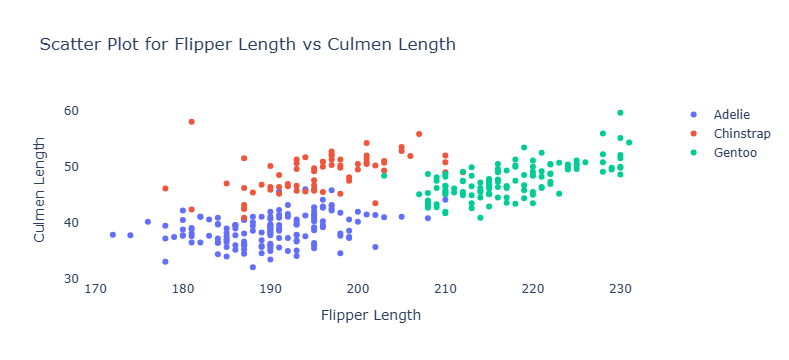

In [48]:
fig = go.Figure()
grouped = df.groupby('species')

for species, group in grouped:
    fig.add_trace(
        go.Scatter(x=group['flipper_length'],
                   y=group['culmen_length'],
                   mode='markers',
                  name=species
                  )
    )

fig.update_layout(
    title='Scatter Plot for Flipper Length vs Culmen Length',
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_title='Flipper Length',
    yaxis_title='Culmen Length'
)

fig.show()

In [86]:
def make_norm_pdf(norm_dist, n=101):
    mean, std = norm_dist.mean(), norm_dist.std()
    low = mean - std*3 # use 3 std from the mean as the lowest quantities
    high = mean + std*3 # use std from the mean as the highest quantities
    qs = np.linspace(low, high, n)
    ps = norm_dist.pdf(qs)
    ps = ps/ps.sum()
    series = pd.Series(index=qs, data=ps)
    return series

In [89]:
hypos = df.species.value_counts().index.to_list()
join_map = {}
for secies in hypos:
    pdf_flipper = make_norm_pdf(flipper_map[species])
    pdf_culmen = make_norm_pdf(culmen_map[species])

    X, Y = np.meshgrid(pdf_flipper, pdf_culmen)
    join_df = pd.DataFrame(X*Y, columns=pdf_flipper.index, index=pdf_culmen.index)
    join_map[species] = join_df

In [92]:
join_map['Gentoo'].head()

,197.732064,198.121163,198.510262,198.899360,199.288459,199.677557,200.066656,200.455754,200.844853,201.233951,...,233.140032,233.529131,233.918229,234.307328,234.696427,235.085525,235.474624,235.863722,236.252821,236.641919
38.259306,7.105520e-08,8.491553e-08,1.011149e-07,1.199718e-07,1.418340e-07,1.670774e-07,1.961063e-07,2.293518e-07,2.672694e-07,3.103364e-07,...,3.103364e-07,2.672694e-07,2.293518e-07,1.961063e-07,1.670774e-07,1.418340e-07,1.199718e-07,1.011149e-07,8.491553e-08,7.105520e-08
38.444217,8.491553e-08,1.014795e-07,1.208388e-07,1.433741e-07,1.695007e-07,1.996682e-07,2.343597e-07,2.740901e-07,3.194041e-07,3.708720e-07,...,3.708720e-07,3.194041e-07,2.740901e-07,2.343597e-07,1.996682e-07,1.695007e-07,1.433741e-07,1.208388e-07,1.014795e-07,8.491553e-08
38.629129,1.011149e-07,1.208388e-07,1.438911e-07,1.707255e-07,2.018363e-07,2.377589e-07,2.790684e-07,3.263783e-07,3.803367e-07,4.416232e-07,...,4.416232e-07,3.803367e-07,3.263783e-07,2.790684e-07,2.377589e-07,2.018363e-07,1.707255e-07,1.438911e-07,1.208388e-07,1.011149e-07
38.814040,1.199718e-07,1.433741e-07,1.707255e-07,2.025642e-07,2.394769e-07,2.820987e-07,3.311121e-07,3.872448e-07,4.512660e-07,5.239818e-07,...,5.239818e-07,4.512660e-07,3.872448e-07,3.311121e-07,2.820987e-07,2.394769e-07,2.025642e-07,1.707255e-07,1.433741e-07,1.199718e-07
38.998952,1.418340e-07,1.695007e-07,2.018363e-07,2.394769e-07,2.831161e-07,3.335047e-07,3.914497e-07,4.578113e-07,5.334989e-07,6.194655e-07,...,6.194655e-07,5.334989e-07,4.578113e-07,3.914497e-07,3.335047e-07,2.831161e-07,2.394769e-07,2.018363e-07,1.695007e-07,1.418340e-07


### Multivariate Normal Distribution

A univariate normal distribution is characterized by its mean and standard deviation.<br/>
A multivariate normal distributioin is characterized by the means of the features and the **covariance matrix**, which contains:
- **variances** which quantify the spread of the features
- **covariances** which quantify the relationships among them

In [96]:
features = df[['flipper_length', 'culmen_length']]
mean = features.mean()
cov = features.cov()

In [97]:
cov

,flipper_length,culmen_length
flipper_length,197.731792,50.375765
culmen_length,50.375765,29.807054


The elements on the diagonal are the variances; the elements off the diagonal are covariances.

In [104]:
colnames = features.columns.to_list()
grouped = df.groupby('species')
multinorm_map = {}
for species, group in grouped:
    features = group[colnames]
    mean = features.mean()
    cov = features.cov()
    multinorm_map[species] = stats.multivariate_normal(mean=mean, cov=cov)

In [111]:
multinorm_map

{'Adelie': <scipy.stats._multivariate.multivariate_normal_frozen at 0x75edb9a3d9d0>,
 'Chinstrap': <scipy.stats._multivariate.multivariate_normal_frozen at 0x75edba5495d0>,
 'Gentoo': <scipy.stats._multivariate.multivariate_normal_frozen at 0x75edb9b21e90>}

In [121]:
data = [193, 48] # flipper_length and culmen_length respectively
update_posterior(prior, data, multinorm_map)

,probs
Adelie,0.002740
Chinstrap,0.997257
Gentoo,0.000003


In [123]:
df['predicted_2'] = np.nan
df['prediction_proba_2'] = np.nan
for i, row in df.iterrows():
    data = row[colnames]
    posterior = update_posterior(prior, data, multinorm_map)
    df.loc[i, 'predicted_2'] = posterior['probs'].idxmax()
    df.loc[i, 'prediction_proba_2'] = posterior['probs'].max()

/tmp/ipykernel_1436/679419869.py:6: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Adelie' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [129]:
wrong_prediction = len(df[df['species'] != df['predicted_2']])

(len(df)-wrong_prediction)/len(df), wrong_prediction, len(df)

(0.9532163742690059, 16, 342)

It turns out to be a little better, the accuracy is 95.3%, compared to 94.7% for the naive bayesian classifier.